In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [17]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/'
files = sorted(glob.glob(os.path.join(path, '*annual_sst_member_*.nc')))

In [20]:
ds = xr.open_dataset(files[1])

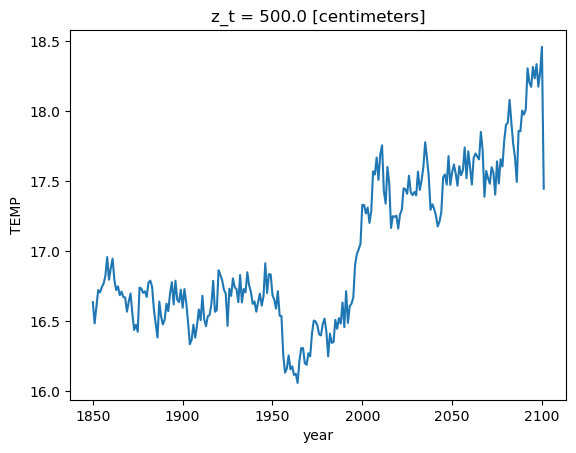

In [26]:
ds.TEMP.isel(z_t=0).mean(dim=['nlat','nlon']).plot()

In [25]:
ds

<xarray.Dataset>
Dimensions:  (z_t: 60, nlat: 384, nlon: 320, year: 252)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100 2101
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (year, z_t, nlat, nlon) float32 ...

In [11]:
# Plot all the time series
plt.figure(figsize=(10, 5))
for file in files:
    ds = xr.open_dataset(file)
    sst = ds['SST']  # Assuming 'SST' is the variable name in the dataset
    sst.plot(label=os.path.basename(file))

plt.title('Sea Surface Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

KeyError: 'SST'

<Figure size 1000x500 with 0 Axes>